<a href="https://colab.research.google.com/github/KeerthiDendi/6220/blob/main/INSE%206220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret==3.0.0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.12.2


In [4]:
import pandas as pd

In [5]:
csv_url = 'https://raw.githubusercontent.com/KeerthiDendi/6220/main/House.csv'

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/KeerthiDendi/6220/main/House.csv')
df = df[['INDUS','NOX','DIS','RAD','TAX','MEDV']]
df['MEDV'] = pd.cut(x=df['MEDV'], bins=[7, 25, 47, 69],
                     labels=["R", "I", "L"])

In [7]:
df.head(35)

,INDUS,NOX,DIS,RAD,TAX,MEDV
0,2.31,0.538,4.0900,1,296,R
1,7.07,0.469,4.9671,2,242,R
2,7.07,0.469,4.9671,2,242,I
3,2.18,0.458,6.0622,3,222,I
4,2.18,0.458,6.0622,3,222,I
5,2.18,0.458,6.0622,3,222,I
6,7.87,0.524,5.5605,5,311,R
7,7.87,0.524,5.9505,5,311,I
8,7.87,0.524,6.0821,5,311,R
9,7.87,0.524,6.5921,5,311,R


In [8]:
len(df.index)

511

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   INDUS   511 non-null    float64 
 1   NOX     511 non-null    float64 
 2   DIS     511 non-null    float64 
 3   RAD     511 non-null    int64   
 4   TAX     511 non-null    int64   
 5   MEDV    505 non-null    category
dtypes: category(1), float64(3), int64(2)
memory usage: 20.7 KB


In [10]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  73


In [11]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  6


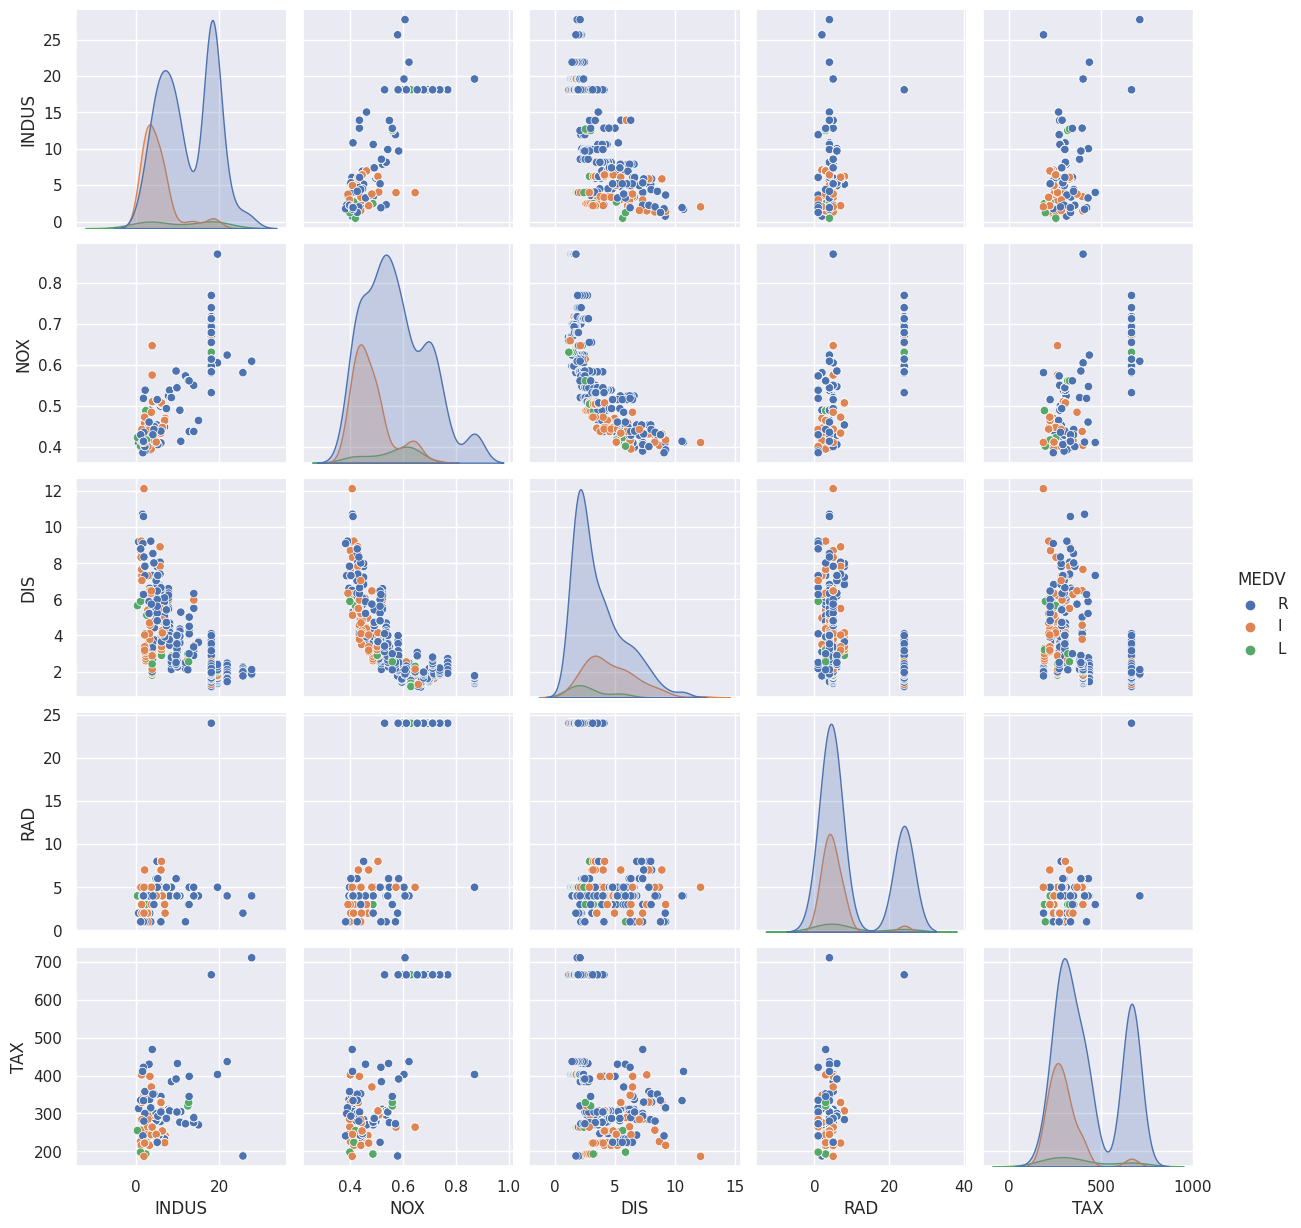

In [12]:
sns.pairplot(df, hue='MEDV')
plt.show()

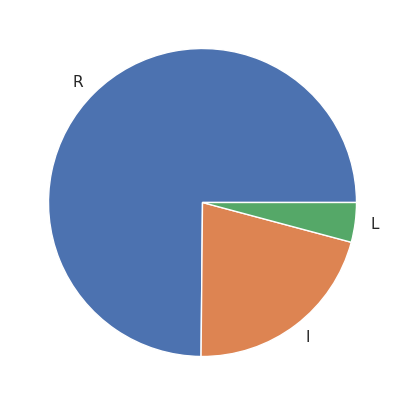

In [13]:
y =df['MEDV']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [14]:
X = df.drop(columns=['MEDV'])
X.head(20)

,INDUS,NOX,DIS,RAD,TAX
0,2.31,0.538,4.0900,1,296
1,7.07,0.469,4.9671,2,242
2,7.07,0.469,4.9671,2,242
3,2.18,0.458,6.0622,3,222
4,2.18,0.458,6.0622,3,222
5,2.18,0.458,6.0622,3,222
6,7.87,0.524,5.5605,5,311
7,7.87,0.524,5.9505,5,311
8,7.87,0.524,6.0821,5,311
9,7.87,0.524,6.5921,5,311


In [15]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INDUS,511.0,11.151096,6.828175,0.4600,5.19000,9.6900,18.100,27.7400
NOX,511.0,0.554757,0.115310,0.3850,0.44900,0.5380,0.624,0.8710
DIS,511.0,3.781425,2.098342,1.1296,2.10035,3.1523,5.118,12.1265
RAD,511.0,9.485323,8.688469,1.0000,4.00000,5.0000,24.000,24.0000
TAX,511.0,407.440313,167.903532,187.0000,279.50000,330.0000,666.000,711.0000


In [16]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(20)

,INDUS,NOX,DIS,RAD,TAX
0,-1.296065,-0.145462,0.147201,-0.977576,-0.664367
1,-0.598270,-0.744435,0.565607,-0.862368,-0.986295
2,-0.598270,-0.744435,0.565607,-0.862368,-0.986295
3,-1.315123,-0.839924,1.088007,-0.747160,-1.105528
4,-1.315123,-0.839924,1.088007,-0.747160,-1.105528
5,-1.315123,-0.839924,1.088007,-0.747160,-1.105528
6,-0.480994,-0.266993,0.848679,-0.516744,-0.574942
7,-0.480994,-0.266993,1.034722,-0.516744,-0.574942
8,-0.480994,-0.266993,1.097500,-0.516744,-0.574942
9,-0.480994,-0.266993,1.340787,-0.516744,-0.574942


In [17]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INDUS,511.0,3.059088e-16,1.00098,-1.567267,-0.873870,-0.214190,1.018678,2.431859
NOX,511.0,6.118176e-16,1.00098,-1.473621,-0.918051,-0.145462,0.601085,2.745238
DIS,511.0,-2.780989e-17,1.00098,-1.265010,-0.801929,-0.300114,0.637591,3.980882
RAD,511.0,5.561978e-17,1.00098,-0.977576,-0.631952,-0.516744,1.672205,1.672205
TAX,511.0,-5.561978e-17,1.00098,-1.314185,-0.762734,-0.461671,1.541439,1.809713


In [18]:
observations = list(df.index)
variables = list(df.columns)

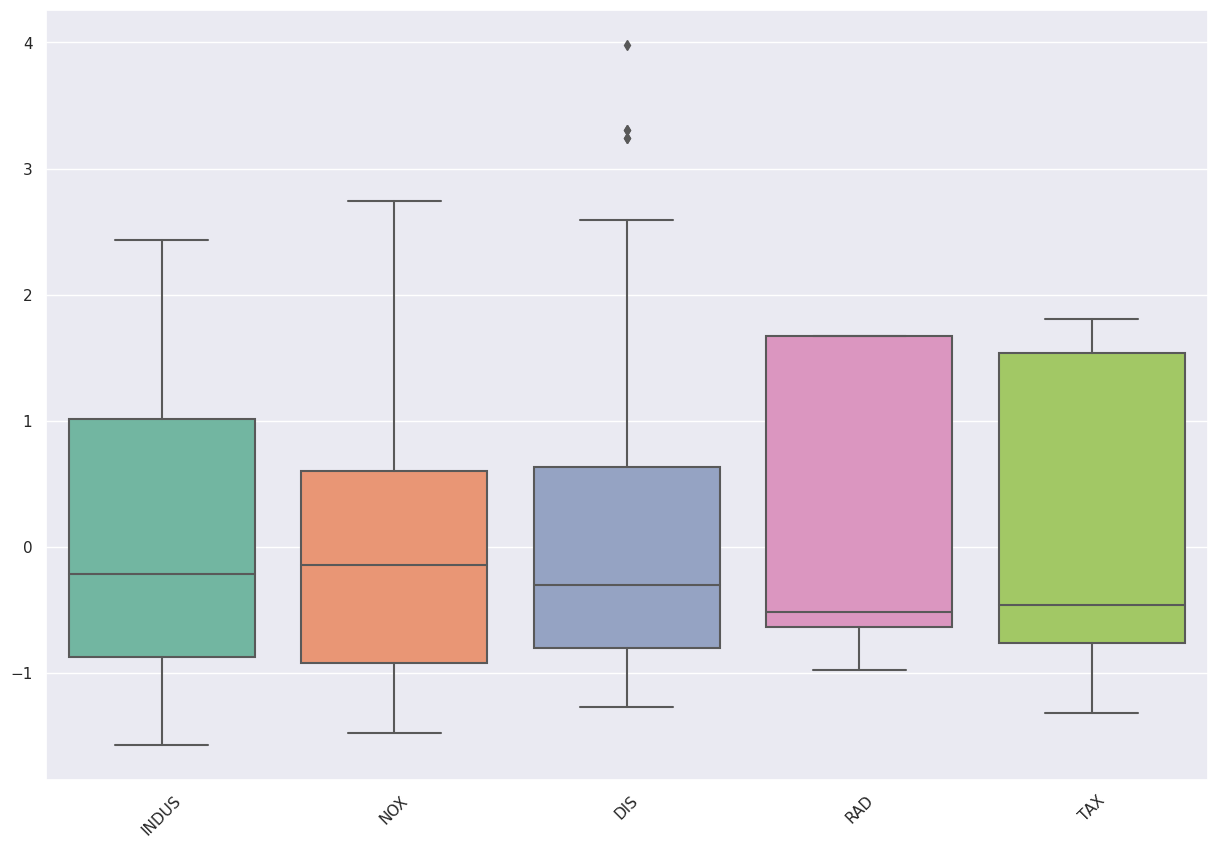

In [19]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


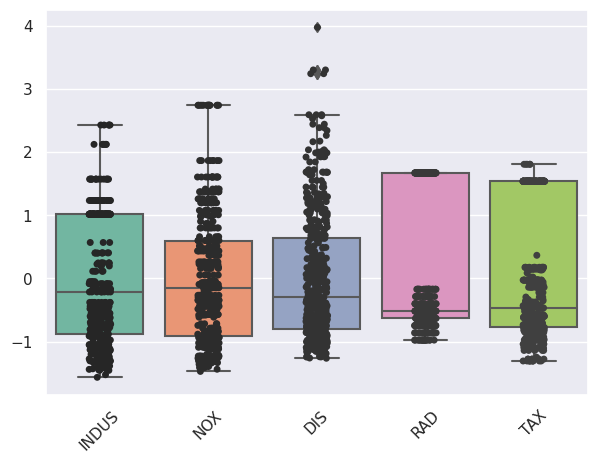

In [20]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

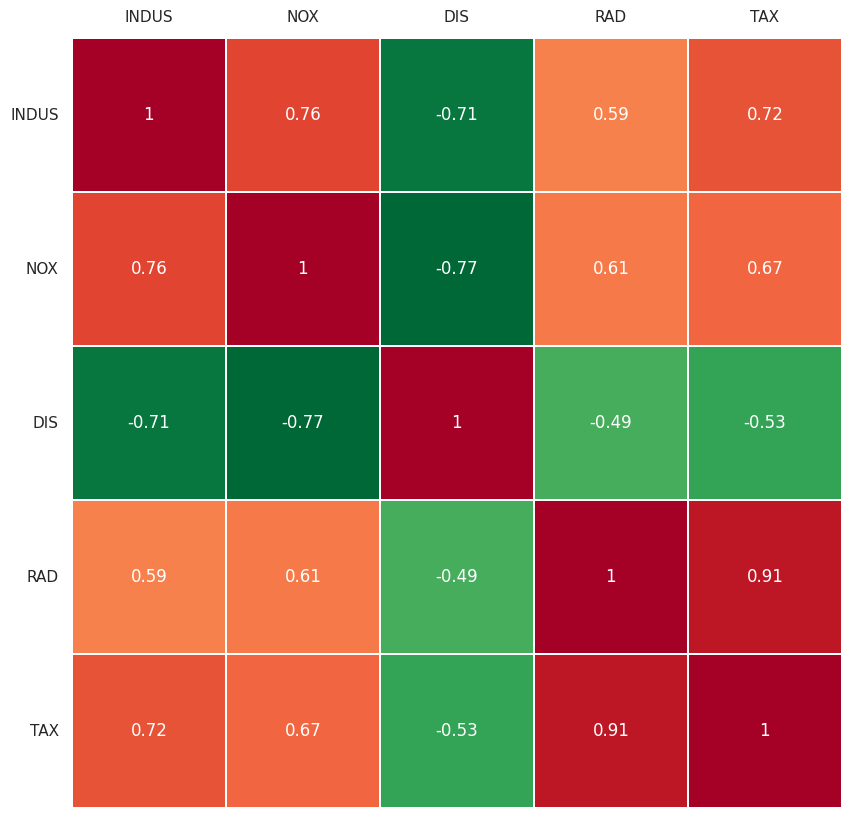

In [21]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

Text(0, 0.5, 'Z2')

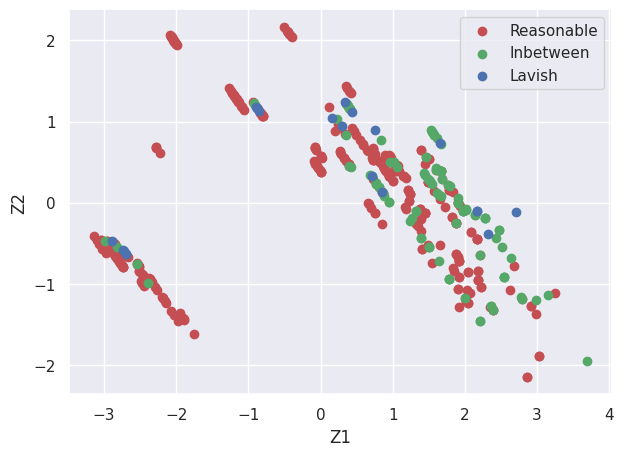

In [22]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Reasonable homes)->R,  2(Inbetween range homes)->I, 3(Lavish homes)->L
idx_Reasonable = np.where(y == "R")
idx_Inbetween = np.where(y == "I")
idx_Lavish = np.where(y == "L")

plt. figure()
plt.scatter(Z[idx_Reasonable,0], Z[idx_Reasonable,1], c='r', label='Reasonable')
plt.scatter(Z[idx_Inbetween,0], Z[idx_Inbetween,1], c='g', label='Inbetween')
plt.scatter(Z[idx_Lavish,0], Z[idx_Lavish,1], c='b', label='Lavish')
plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

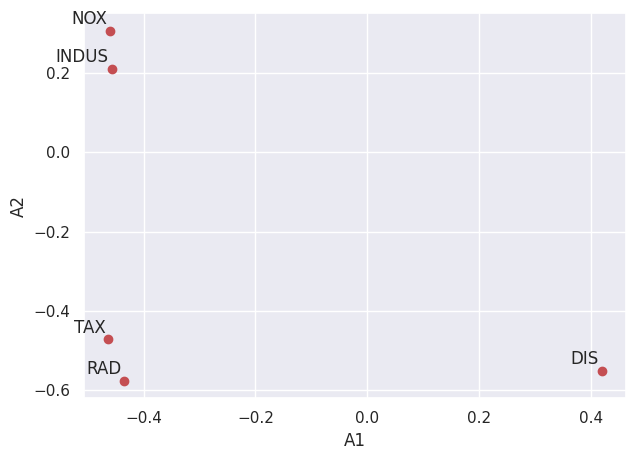

In [23]:
A = pca.components_.T

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

In [24]:
print(A)

[[-0.45737941  0.21201912  0.79779273 -0.21085857 -0.2547889 ]
 [-0.46001014  0.30770098 -0.12549855  0.82334984  0.00747857]
 [ 0.41912659 -0.55153669  0.49567357  0.5166293  -0.08684503]
 [-0.43483421 -0.57714692 -0.31019085 -0.06895859 -0.61387864]
 [-0.46308406 -0.47230997  0.07659128 -0.07728246  0.74204962]]


/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


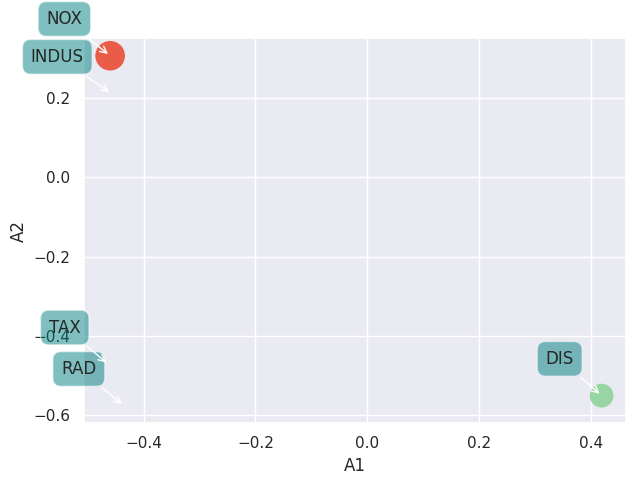

In [25]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='Teal', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Text(0, 0.5, 'Explained variance')

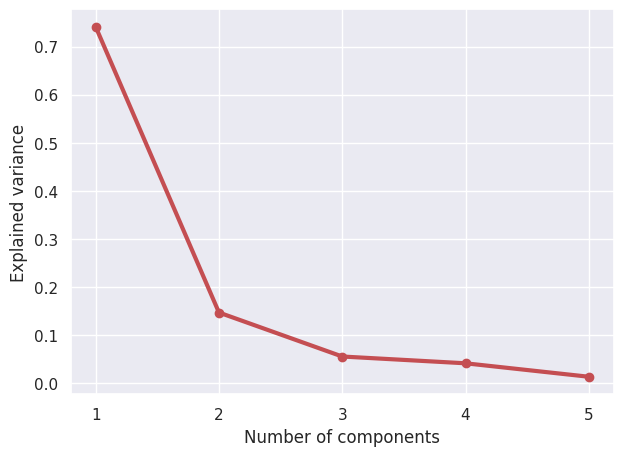

In [26]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [27]:
PC_variance = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
PC_variance

{'0': 'PC 1 (74.1%)',
 '1': 'PC 2 (14.7%)',
 '2': 'PC 3 (5.6%)',
 '3': 'PC 4 (4.2%)',
 '4': 'PC 5 (1.4%)'}

In [28]:
print(Lambda)

[3.71388359 0.73789945 0.27978847 0.20916445 0.06906796]


Text(0, 0.5, 'Cumulative explained variance')

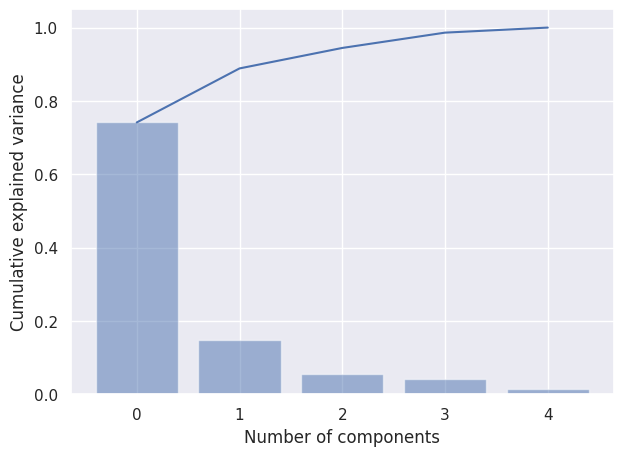

In [29]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

array([ 0.47725598,  0.29568877,  0.29568877, -0.1839791 , -0.1839791 ,
       -0.1839791 , -0.08242292, -0.18503253, -0.21965669, -0.35383849,
       -0.28927336, -0.25770118, -0.05358699,  0.2655446 ,  0.33016234,
        0.32050652,  0.59465834,  0.38383506,  0.50523012,  0.50523012,
        0.50486178,  0.44845281,  0.4577666 ,  0.42664169,  0.40819827,
        0.33208299,  0.27225369,  0.33239871,  0.33205668,  0.38880768,
        0.38415078,  0.40564618,  0.45431997,  0.50767697,  0.51488595,
        0.46041491,  0.45578433,  0.30942093,  0.33228445, -0.15071498,
       -0.15071498, -0.00485312, -0.00485312, -0.00485312, -0.00485312,
        0.1584014 ,  0.1584014 ,  0.00343458, -0.04408156, -0.10135877,
       -0.45079558, -0.45079558, -0.45079558, -0.45079558, -1.28196175,
       -1.19808797, -1.368986  , -1.16026225, -1.07379242, -0.84152636,
       -0.91872036, -0.81166434, -0.91874667, -1.11749359, -1.13545302,
       -0.8420814 , -0.8420814 , -0.72144452, -0.72144452, -0.72

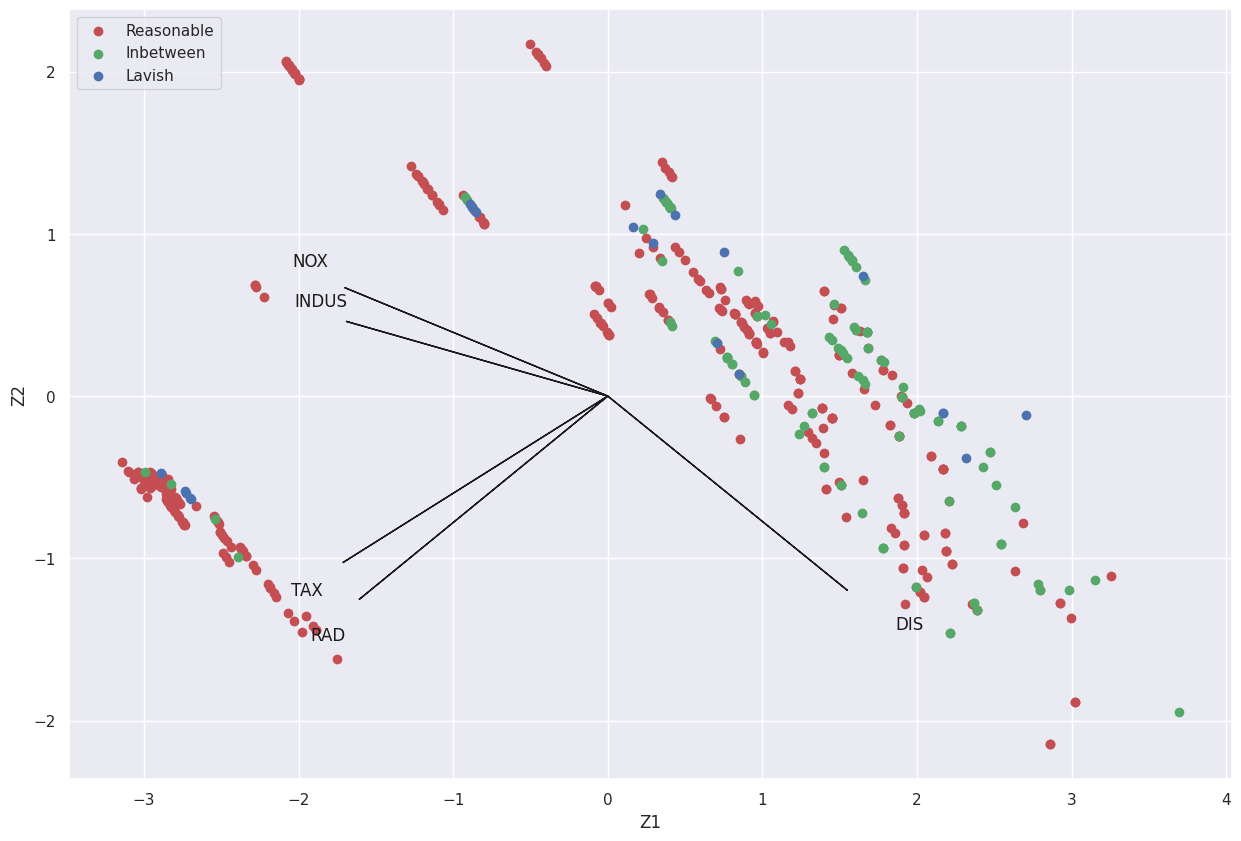

In [30]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure(figsize=(15,10))
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Reasonable,0], Z[idx_Reasonable,1], c='r', label='Reasonable')
plt.scatter(Z[idx_Inbetween,0], Z[idx_Inbetween,1], c='g', label='Inbetween')
plt.scatter(Z[idx_Lavish,0], Z[idx_Lavish,1], c='b', label='Lavish')
plt.legend(loc='upper left')
Z1
Z2

Using PCA Library

In [31]:
!pip install pca

In [32]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [33]:
out['PC']

,PC1,PC2,PC3,PC4
0,1.454144,0.477256,-0.690422,0.348325
1,1.684870,0.295689,0.088443,-0.058880
2,1.684870,0.295689,0.088443,-0.058880
3,2.280739,-0.183979,-0.257401,0.284811
4,2.280739,-0.183979,-0.257401,0.284811
...,...,...,...,...
506,0.114336,1.178944,-0.055258,-0.320143
507,0.225502,1.032659,0.076210,-0.183117
508,0.292081,0.945046,0.154949,-0.101050
509,0.165052,1.042738,0.077464,-0.220802


[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '4 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (74.1% expl.var)', ylabel='PC2 (14.7% expl.var)'>)

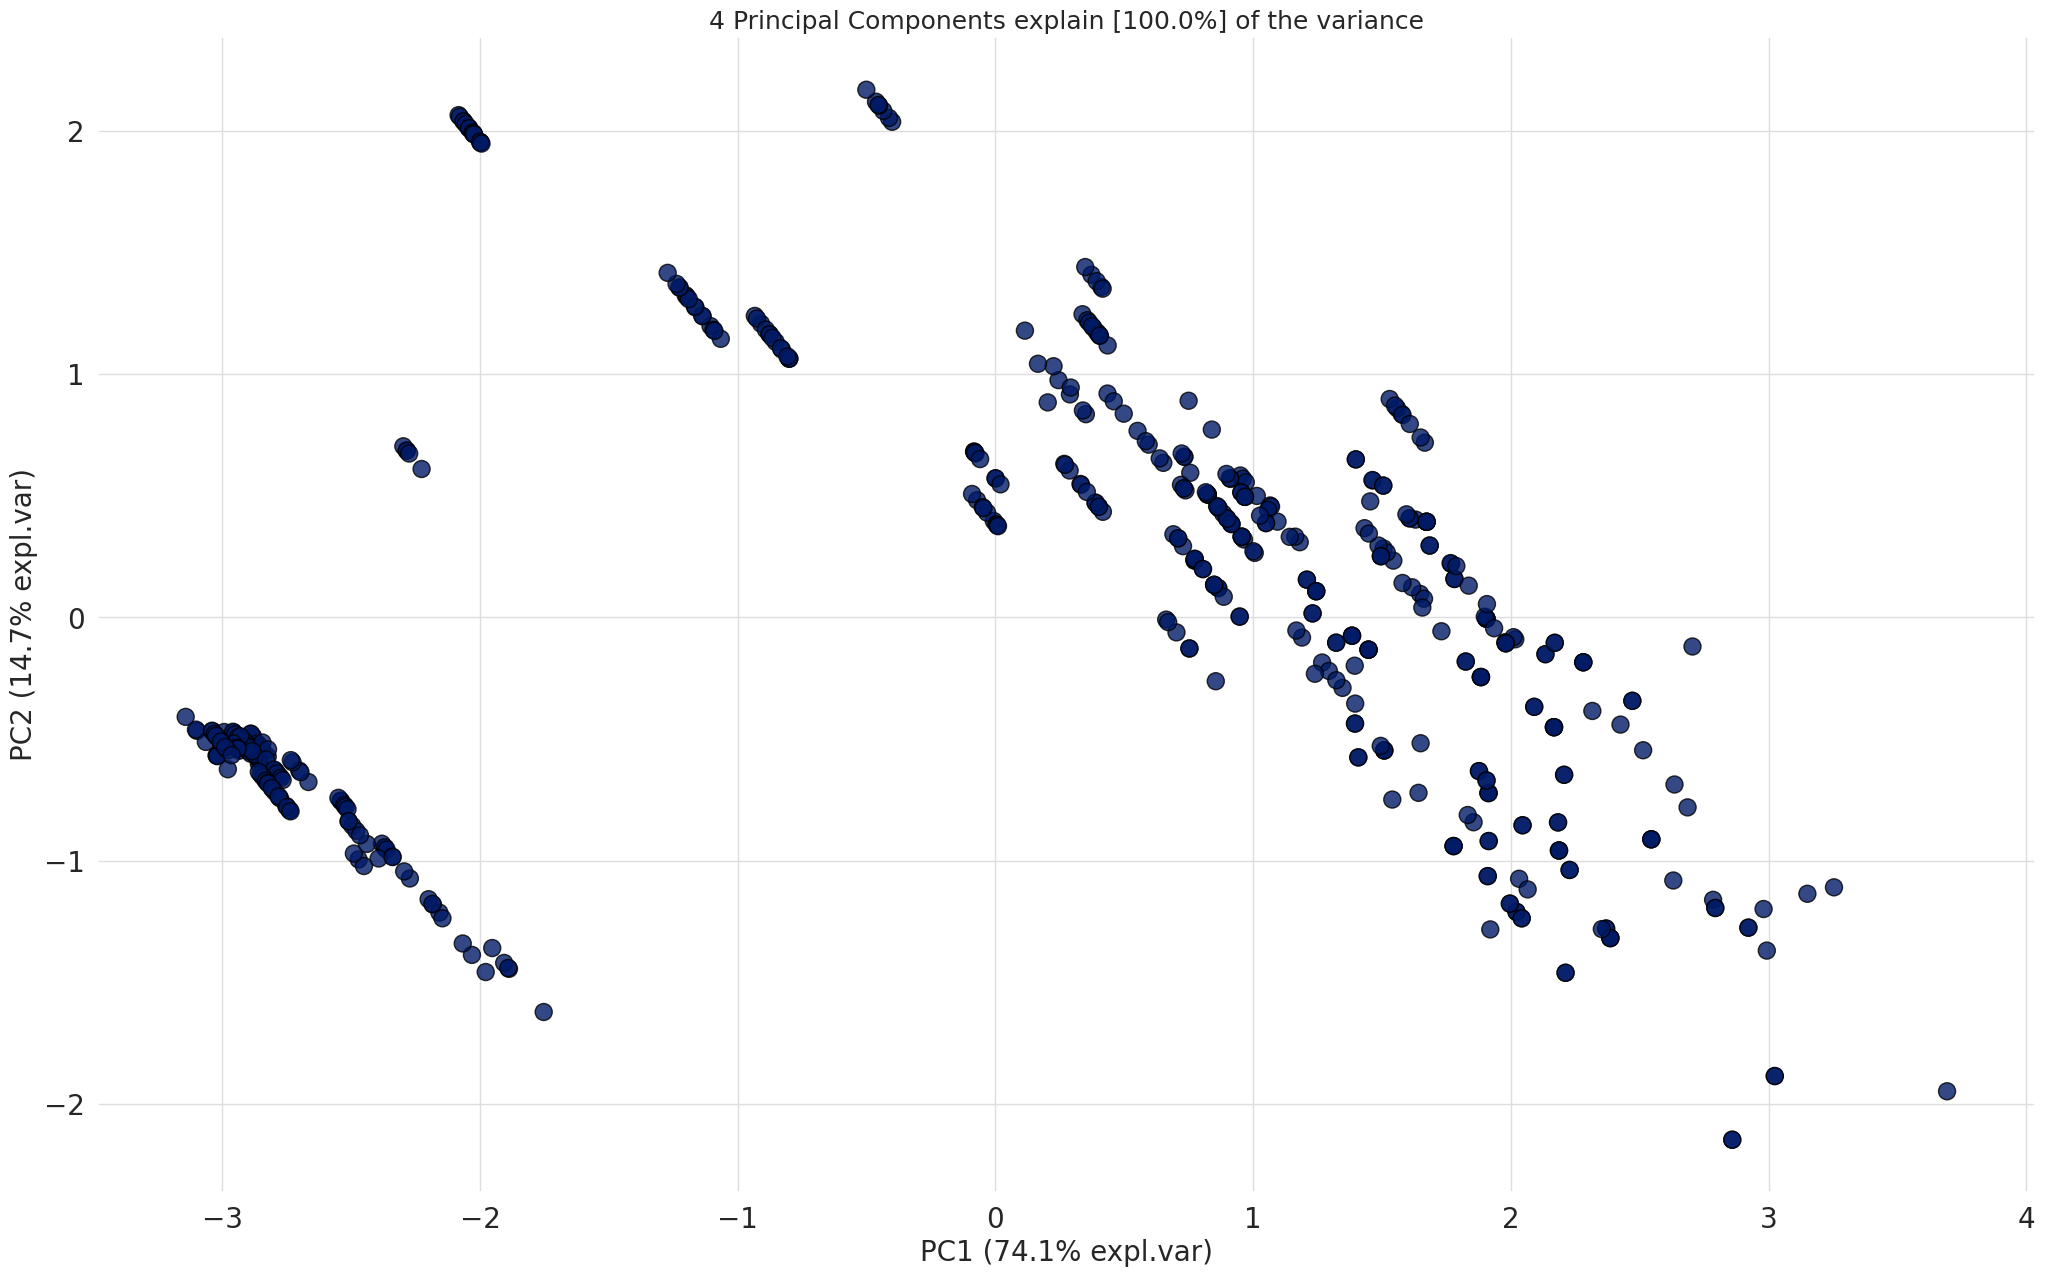

In [34]:
model.scatter(label=True, legend=False)

In [35]:
A = out['loadings'].T

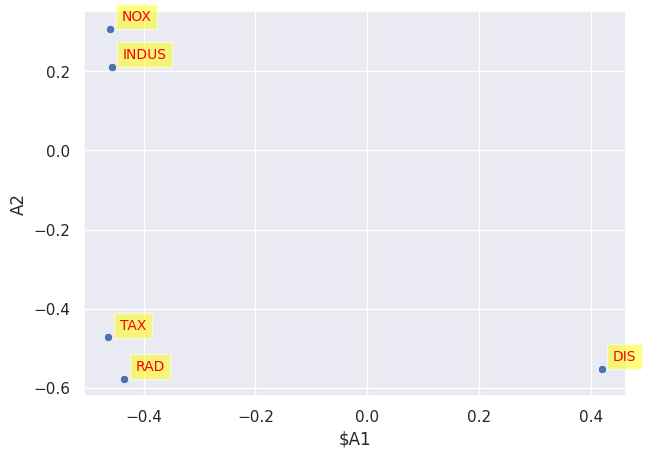

In [36]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

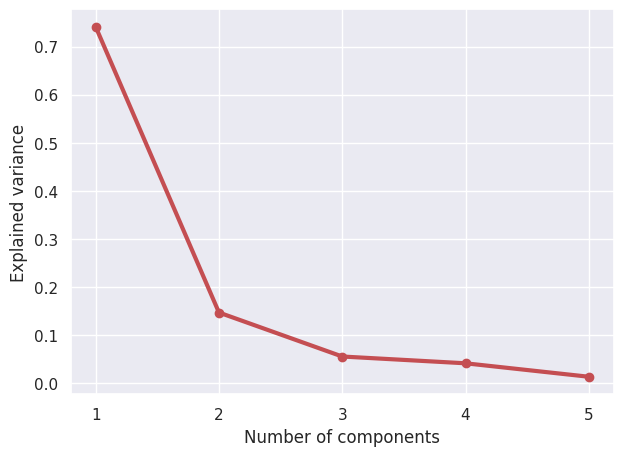

In [37]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

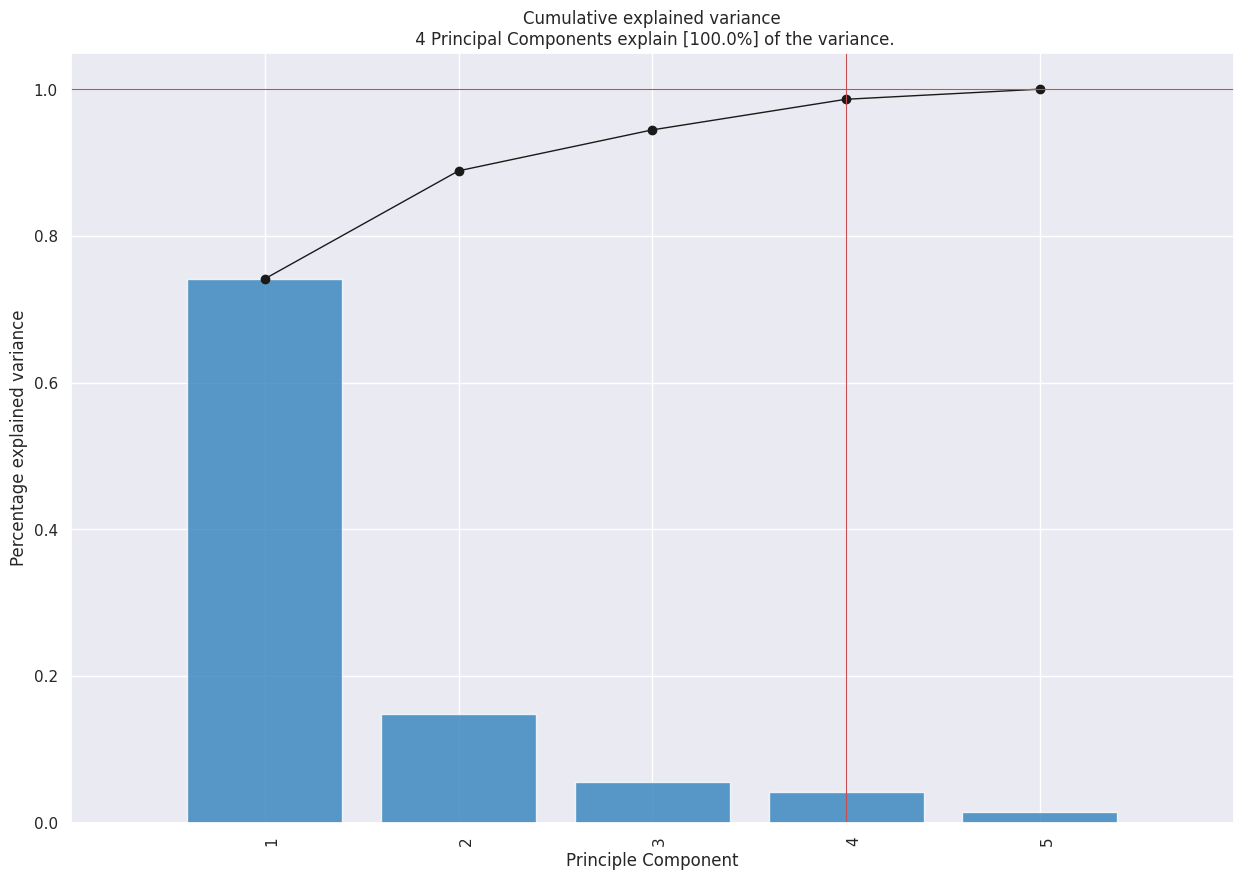

In [38]:
model.plot();

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <AxesSubplot: title={'center': '4 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (74.1% expl.var)', ylabel='PC2 (14.7% expl.var)'>)

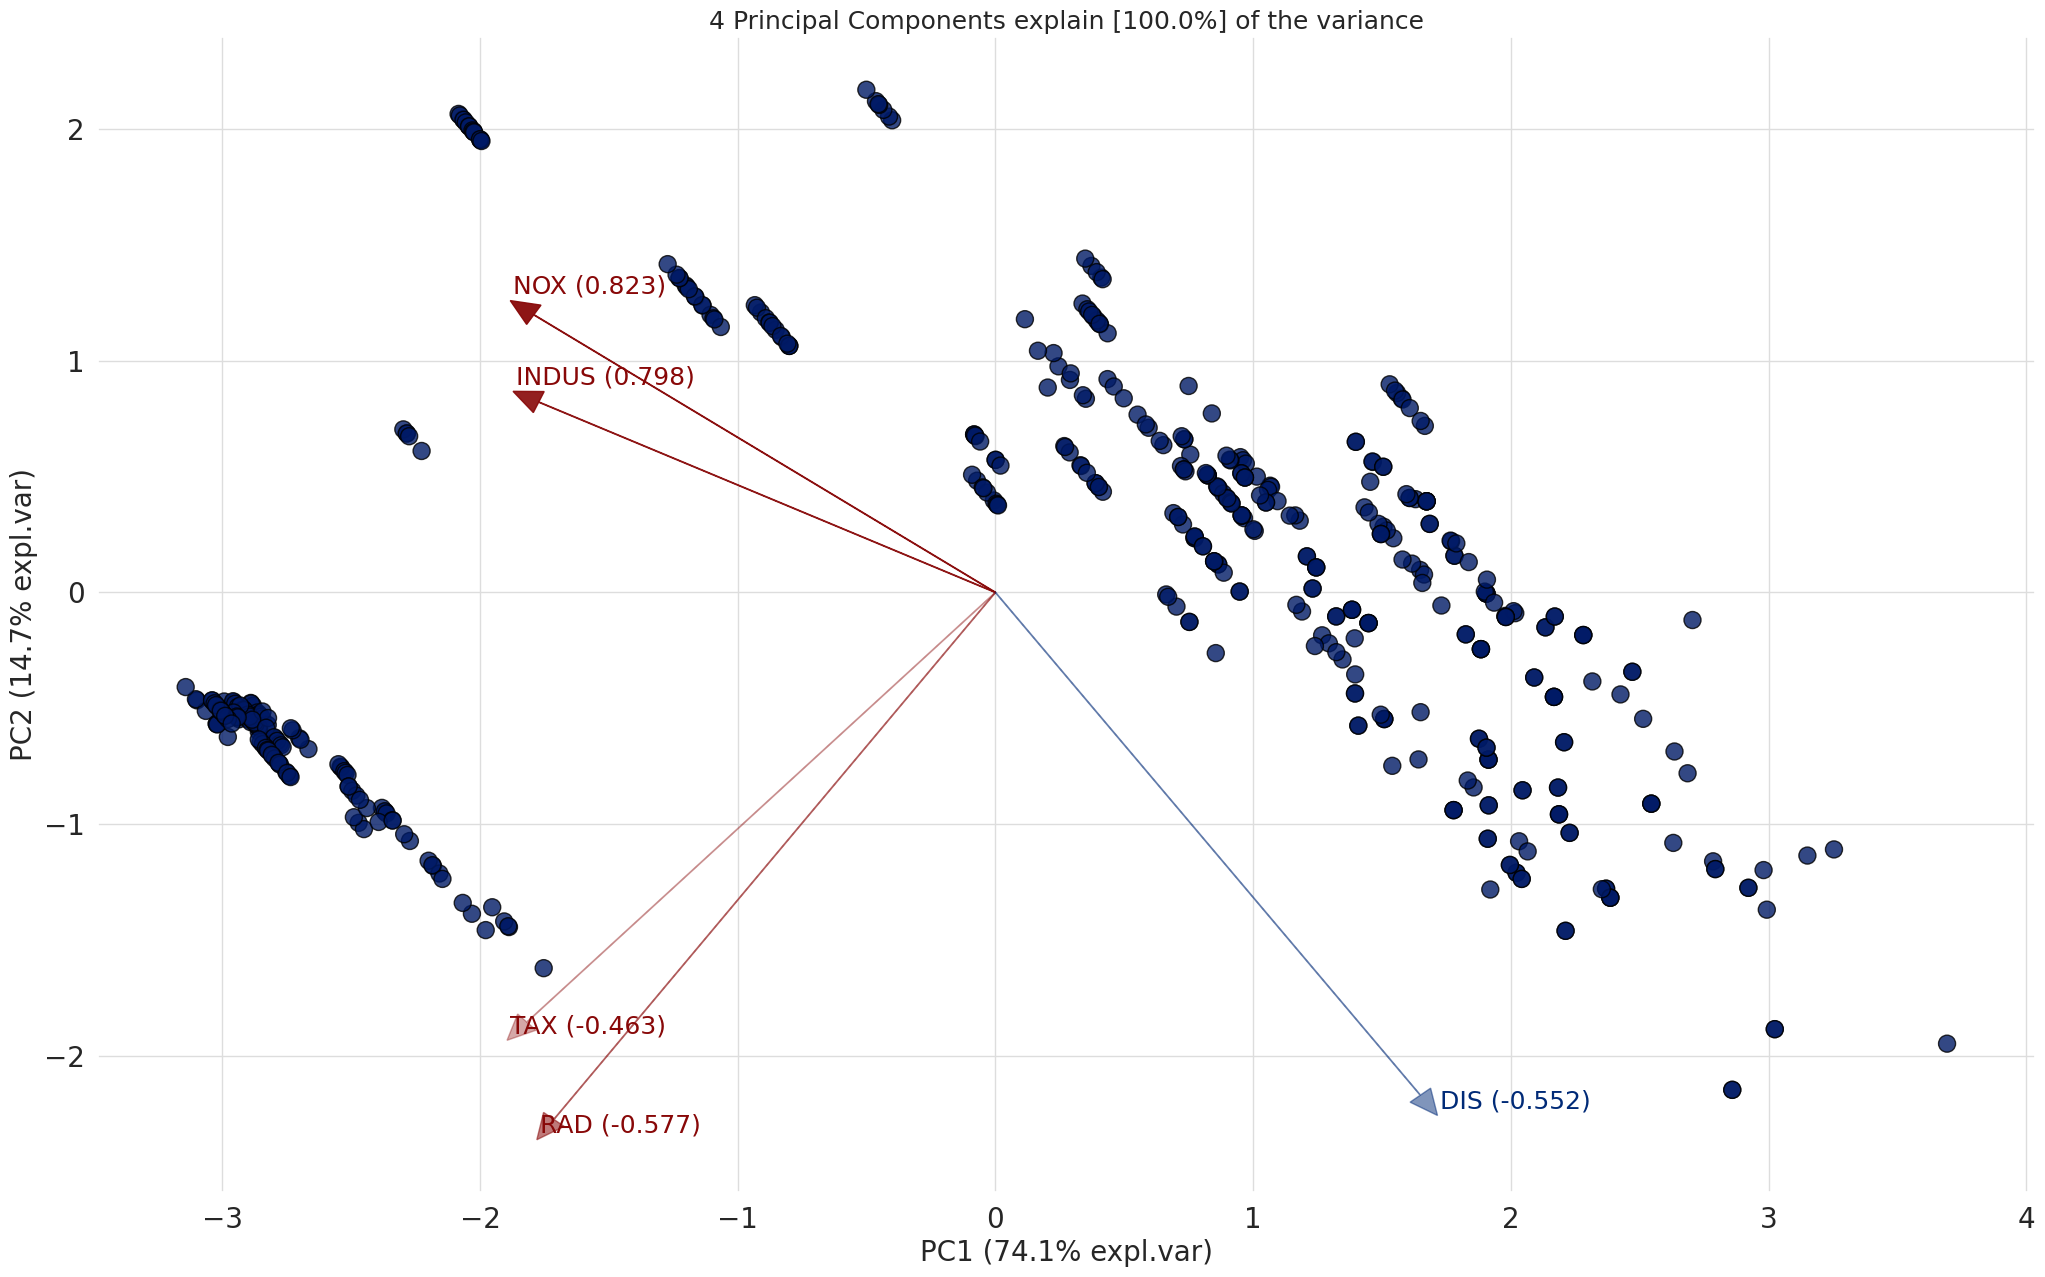

In [39]:
model.biplot(label=False, legend=False)

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


(<Figure size 3000x2500 with 1 Axes>,
 <Axes3DSubplot: title={'center': '4 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (74.1% expl.var)', ylabel='PC2 (14.7% expl.var)', zlabel='PC3 (5.58% expl.var)'>)

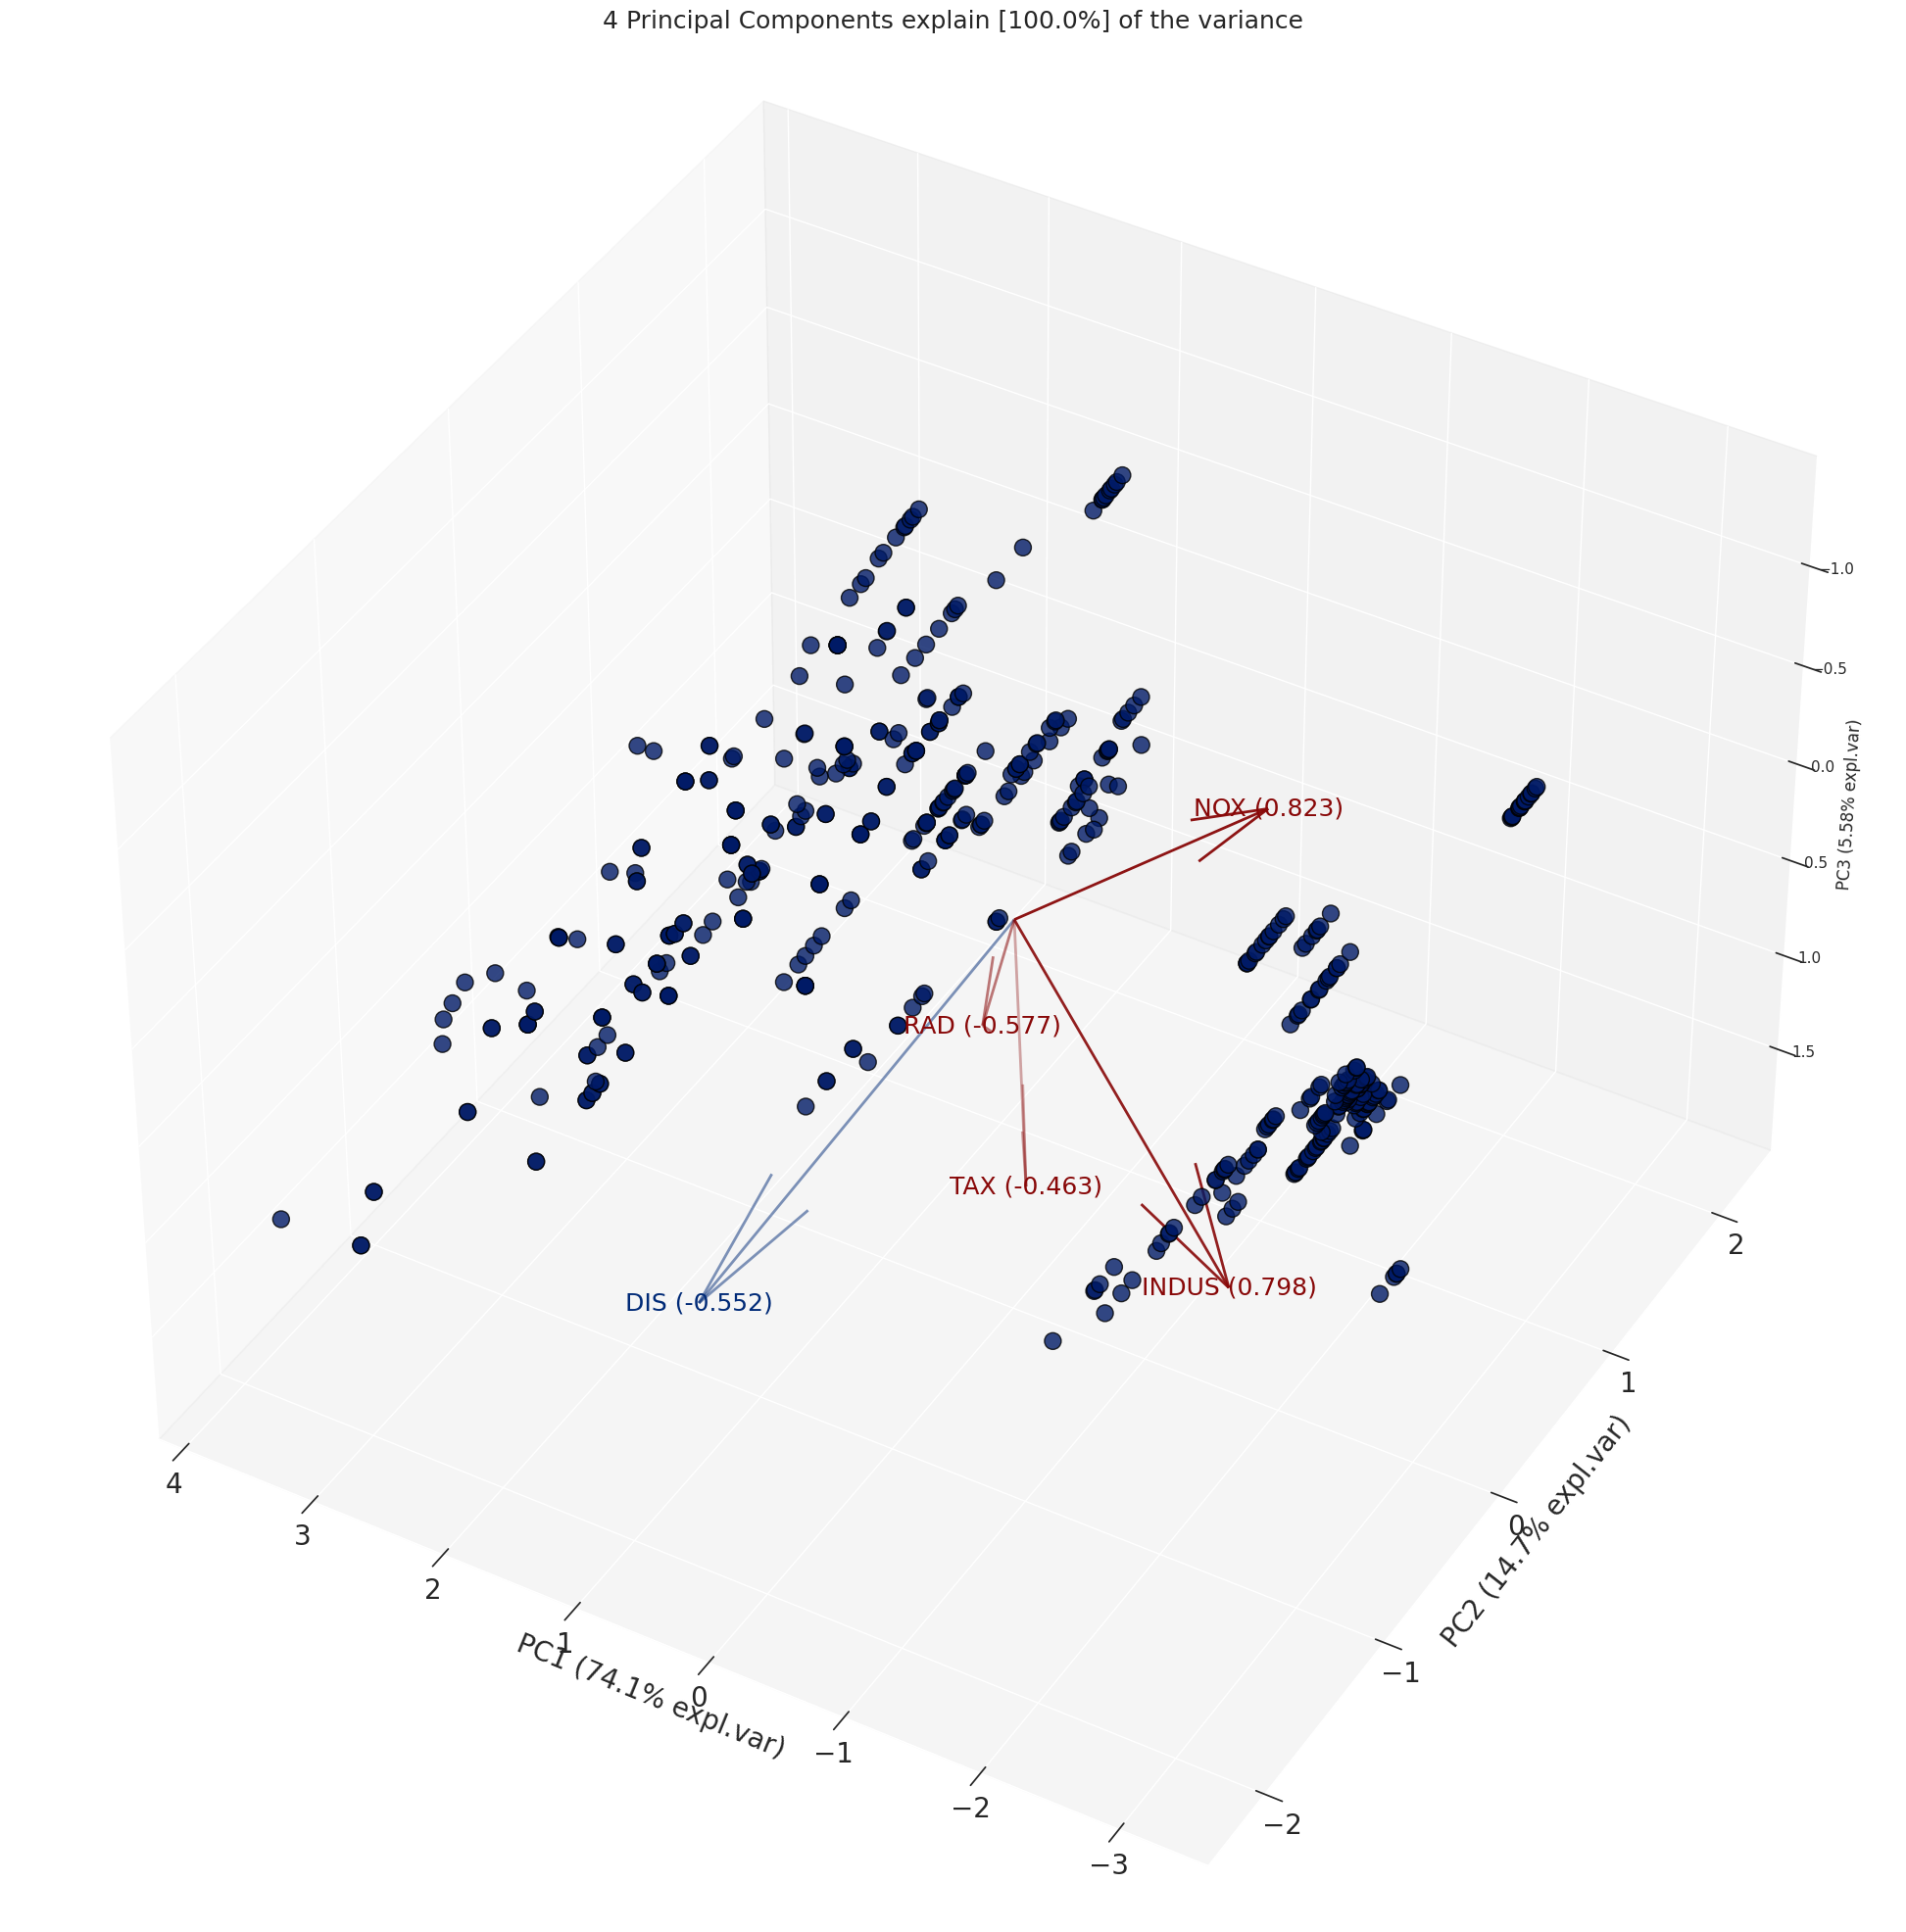

In [40]:
model.biplot3d(legend=False)

In [41]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

data = data.dropna(subset=['MEDV'])

Data for Modeling: (460, 6)
Unseen Data For Predictions: (51, 6)


In [42]:
from pycaret.utils import version
version()

'3.0.0'

In [43]:
from pycaret.classification import *
clf = setup(data=data, target='MEDV', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,MEDV
2,Target type,Multiclass
3,Target mapping,"I: 0, L: 1, R: 2"
4,Original data shape,"(455, 6)"
5,Transformed data shape,"(455, 6)"
6,Transformed train set shape,"(318, 6)"
7,Transformed test set shape,"(137, 6)"
8,Numeric features,5
9,Preprocess,True


In [44]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8616,0.8804,0.8616,0.8457,0.8503,0.6320,0.6400,0.1820
lightgbm,Light Gradient Boosting Machine,0.8613,0.8964,0.8613,0.8483,0.8504,0.6354,0.6461,1.5160
rf,Random Forest Classifier,0.8583,0.9009,0.8583,0.8476,0.8494,0.6255,0.6333,0.4640
et,Extra Trees Classifier,0.8583,0.8639,0.8583,0.8494,0.8505,0.6347,0.6415,0.6170
gbc,Gradient Boosting Classifier,0.8550,0.8952,0.8550,0.8306,0.8401,0.6113,0.6206,0.7550
knn,K Neighbors Classifier,0.8459,0.8652,0.8459,0.8246,0.8235,0.5604,0.5839,0.1410
dt,Decision Tree Classifier,0.8331,0.8006,0.8331,0.8247,0.8266,0.5802,0.5864,0.0680
lr,Logistic Regression,0.7893,0.8043,0.7893,0.7490,0.7553,0.3672,0.3967,0.7760
lda,Linear Discriminant Analysis,0.7799,0.7906,0.7799,0.7320,0.7408,0.3188,0.3524,0.0740
ridge,Ridge Classifier,0.7643,0.0000,0.7643,0.6994,0.7079,0.2145,0.2565,0.0540


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [45]:
best_model

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [46]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8125,0.8323,0.8125,0.8188,0.7639,0.3379,0.4484
1,0.7812,0.8833,0.7812,0.7440,0.7610,0.3743,0.3803
2,0.7812,0.8589,0.7812,0.7656,0.7729,0.4286,0.4297
3,0.7500,0.8575,0.7500,0.6844,0.6875,0.1172,0.1556
4,0.8750,0.7713,0.8750,0.8197,0.8462,0.6484,0.6615
5,0.7188,0.7559,0.7188,0.6836,0.7005,0.2461,0.2488
6,0.8750,0.9442,0.8750,0.8181,0.8430,0.6667,0.6894
7,0.7188,0.6627,0.7188,0.6484,0.6715,0.1818,0.2034
8,0.8065,0.8000,0.8065,0.7739,0.7761,0.4038,0.4386


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [47]:
tuned_lr=tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8125,0.8396,0.8125,0.8188,0.7639,0.3379,0.4484
1,0.8438,0.8846,0.8438,0.8242,0.8333,0.5918,0.5934
2,0.8125,0.8550,0.8125,0.7850,0.7985,0.4880,0.4903
3,0.7812,0.8588,0.7812,0.7407,0.7384,0.2704,0.3154
4,0.8750,0.7699,0.8750,0.8197,0.8462,0.6484,0.6615
5,0.7500,0.7606,0.7500,0.6971,0.7225,0.2967,0.3027
6,0.8750,0.9477,0.8750,0.8181,0.8430,0.6667,0.6894
7,0.7188,0.6662,0.7188,0.6484,0.6715,0.1818,0.2034
8,0.8387,0.8054,0.8387,0.8084,0.8168,0.5274,0.5489


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [48]:
tuned_lr

LogisticRegression(C=7.689, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [51]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9062,0.9917,0.9062,0.9267,0.8999,0.7405,0.7584
1,0.8125,0.7581,0.8125,0.8188,0.7639,0.3379,0.4484
2,0.8750,0.8894,0.8750,0.8632,0.8662,0.6870,0.6923
3,0.8750,0.9265,0.8750,0.8750,0.8750,0.6784,0.6784
4,0.8125,0.8483,0.8125,0.7795,0.7890,0.4514,0.4691
5,0.8125,0.8071,0.8125,0.7572,0.7837,0.4725,0.4821
6,0.9062,0.9793,0.9062,0.8576,0.8789,0.7778,0.7855
7,0.7812,0.7572,0.7812,0.7264,0.7507,0.4167,0.4309
8,0.9032,0.9644,0.9032,0.9140,0.9049,0.7603,0.7623


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [52]:
tuned_knn = tune_model(knn)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8750,0.8620,0.8750,0.8750,0.8750,0.6784,0.6784
1,0.8125,0.7666,0.8125,0.7971,0.8006,0.4725,0.4805
2,0.9062,0.9228,0.9062,0.8828,0.8938,0.7551,0.7572
3,0.9062,0.9573,0.9062,0.8775,0.8916,0.7440,0.7475
4,0.8438,0.8475,0.8438,0.7889,0.8128,0.5376,0.5604
5,0.8750,0.7505,0.8750,0.8173,0.8450,0.6484,0.6615
6,0.8750,0.9445,0.8750,0.8814,0.8771,0.7205,0.7225
7,0.8125,0.8094,0.8125,0.7600,0.7852,0.5200,0.5288
8,0.9032,0.9274,0.9032,0.8838,0.8901,0.7628,0.7688


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [53]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=42, p=2,
                     weights='distance')

In [54]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [55]:
qda=create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6875,0.7601,0.6875,0.8125,0.7083,0.4074,0.4627
1,0.6875,0.8884,0.6875,0.8401,0.7045,0.4128,0.4994
2,0.7500,0.8693,0.7500,0.8115,0.7760,0.4374,0.4470
3,0.6562,0.7145,0.6562,0.8094,0.6843,0.3748,0.4340
4,0.7500,0.8558,0.7500,0.8782,0.7684,0.5396,0.6115
5,0.6562,0.7011,0.6562,0.7728,0.6791,0.3358,0.3799
6,0.7812,0.9647,0.7812,0.8589,0.8019,0.5750,0.6037
7,0.7188,0.7324,0.7188,0.7925,0.7386,0.4483,0.4737
8,0.6774,0.7731,0.6774,0.7514,0.6855,0.3432,0.3799


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [56]:
tuned_qda=tune_model(qda)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6875,0.7283,0.6875,0.7604,0.6964,0.3522,0.3885
1,0.7188,0.9025,0.7188,0.8457,0.7332,0.4545,0.5317
2,0.8125,0.8875,0.8125,0.8336,0.8125,0.5666,0.5853
3,0.7812,0.7942,0.7812,0.7979,0.7792,0.4944,0.5107
4,0.7188,0.7826,0.7188,0.7576,0.7114,0.4122,0.4499
5,0.6250,0.6870,0.6250,0.7202,0.6464,0.2441,0.2734
6,0.8125,0.9372,0.8125,0.8104,0.7964,0.6000,0.6253
7,0.6250,0.6022,0.6250,0.6272,0.6199,0.1724,0.1770
8,0.6774,0.7683,0.6774,0.7514,0.6855,0.3432,0.3799


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [57]:
tuned_qda

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.47,
                              store_covariance=False, tol=0.0001)

In [58]:
evaluate_model(tuned_qda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [59]:
!pip install statsmodels --upgrade

In [60]:
clf_pca = setup(data=data, target='MEDV', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

,Description,Value
0,Session id,123
1,Target,MEDV
2,Target type,Multiclass
3,Target mapping,"I: 0, L: 1, R: 2"
4,Original data shape,"(455, 6)"
5,Transformed data shape,"(455, 4)"
6,Transformed train set shape,"(318, 4)"
7,Transformed test set shape,"(137, 4)"
8,Numeric features,5
9,Preprocess,True


In [61]:
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8549,0.8420,0.8549,0.8406,0.8442,0.6154,0.6225,0.5250
lightgbm,Light Gradient Boosting Machine,0.8457,0.8547,0.8457,0.8391,0.8389,0.5959,0.6024,0.8600
rf,Random Forest Classifier,0.8393,0.8642,0.8393,0.8156,0.8232,0.5553,0.5667,0.5150
xgboost,Extreme Gradient Boosting,0.8362,0.8548,0.8362,0.8212,0.8248,0.5656,0.5738,0.2440
gbc,Gradient Boosting Classifier,0.8174,0.8415,0.8174,0.8005,0.8056,0.5082,0.5145,0.7700
lr,Logistic Regression,0.7956,0.7880,0.7956,0.7379,0.7532,0.3522,0.3808,0.2300
nb,Naive Bayes,0.7892,0.7580,0.7892,0.7538,0.7641,0.4083,0.4229,0.2160
lda,Linear Discriminant Analysis,0.7831,0.7807,0.7831,0.7199,0.7361,0.3021,0.3313,0.2290
dt,Decision Tree Classifier,0.7671,0.7247,0.7671,0.7766,0.7668,0.4337,0.4400,0.1300
knn,K Neighbors Classifier,0.7670,0.8147,0.7670,0.7298,0.7441,0.3560,0.3660,0.2130


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [62]:
best_model_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [63]:
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8125,0.9392,0.8125,0.8188,0.7639,0.3379,0.4484
1,0.7812,0.9294,0.7812,0.7440,0.7610,0.3743,0.3803
2,0.8125,0.9358,0.8125,0.7665,0.7667,0.3746,0.4370
3,0.7188,0.7944,0.7188,0.5565,0.6273,-0.0549,-0.0955
4,0.8125,0.9147,0.8125,0.7567,0.7760,0.4146,0.4499
5,0.7500,0.7416,0.7500,0.6573,0.6926,0.1742,0.2027
6,0.8438,0.9397,0.8438,0.7873,0.8071,0.5652,0.6021
7,0.7188,0.6893,0.7188,0.6365,0.6453,0.1000,0.1389
8,0.8387,0.8511,0.8387,0.8353,0.8047,0.4764,0.5566


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [64]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [65]:
lr_pca = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8125,0.8680,0.8125,0.8188,0.7639,0.3379,0.4484
1,0.7500,0.9106,0.7500,0.6986,0.7200,0.2493,0.2593
2,0.7812,0.8581,0.7812,0.7254,0.7430,0.3086,0.3349
3,0.7188,0.8248,0.7188,0.5565,0.6273,-0.0549,-0.0955
4,0.9062,0.7617,0.9062,0.8542,0.8763,0.7225,0.7532
5,0.7812,0.7434,0.7812,0.7098,0.7385,0.3171,0.3440
6,0.8750,0.8932,0.8750,0.8181,0.8430,0.6667,0.6894
7,0.7500,0.6365,0.7500,0.6903,0.7131,0.3043,0.3242
8,0.8065,0.7228,0.8065,0.7739,0.7761,0.4038,0.4386


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [66]:
tuned_lr_pca = tune_model(lr_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8125,0.8707,0.8125,0.8188,0.7639,0.3379,0.4484
1,0.7500,0.9044,0.7500,0.6986,0.7200,0.2493,0.2593
2,0.7812,0.8581,0.7812,0.7254,0.7430,0.3086,0.3349
3,0.7500,0.8238,0.7500,0.6844,0.6875,0.1172,0.1556
4,0.9062,0.7639,0.9062,0.8542,0.8763,0.7225,0.7532
5,0.7812,0.7351,0.7812,0.7098,0.7385,0.3171,0.3440
6,0.8750,0.8924,0.8750,0.8181,0.8430,0.6667,0.6894
7,0.7500,0.6282,0.7500,0.6903,0.7131,0.3043,0.3242
8,0.8065,0.7199,0.8065,0.7739,0.7761,0.4038,0.4386


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [67]:
tuned_lr_pca

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [69]:
knn_pca = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7188,0.7520,0.7188,0.6693,0.6887,0.1700,0.1774
1,0.8438,0.9483,0.8438,0.8472,0.8392,0.6244,0.6356
2,0.8438,0.8674,0.8438,0.8093,0.8246,0.5531,0.5619
3,0.7500,0.7860,0.7500,0.6987,0.7142,0.2099,0.2277
4,0.8438,0.9175,0.8438,0.7889,0.8128,0.5376,0.5604
5,0.6875,0.7870,0.6875,0.6719,0.6786,0.2000,0.2021
6,0.8125,0.9425,0.8125,0.7847,0.7933,0.5714,0.5805
7,0.7188,0.6975,0.7188,0.6623,0.6877,0.2500,0.2585
8,0.7419,0.8382,0.7419,0.7065,0.7225,0.2791,0.2836


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [70]:
tuned_knn_pca = tune_model(knn_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8125,0.8579,0.8125,0.8125,0.8125,0.5176,0.5176
1,0.8750,0.8208,0.8750,0.8750,0.8750,0.6784,0.6784
2,0.8750,0.8893,0.8750,0.8462,0.8603,0.6587,0.6618
3,0.8750,0.8907,0.8750,0.8458,0.8583,0.6425,0.6527
4,0.8750,0.8869,0.8750,0.8760,0.8680,0.6522,0.6621
5,0.8125,0.7505,0.8125,0.7812,0.7946,0.5200,0.5255
6,0.8750,0.9575,0.8750,0.8840,0.8771,0.7235,0.7258
7,0.8438,0.7314,0.8438,0.8477,0.8402,0.6200,0.6223
8,0.9032,0.9223,0.9032,0.8838,0.8901,0.7628,0.7688


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [72]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=12, p=2,
                     weights='distance')

In [73]:
evaluate_model(tuned_knn_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [74]:
qda_pca = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7500,0.7893,0.7500,0.8177,0.7530,0.4818,0.5314
1,0.7500,0.8644,0.7500,0.8521,0.7612,0.4990,0.5660
2,0.8125,0.8784,0.8125,0.8336,0.8125,0.5666,0.5853
3,0.7812,0.7627,0.7812,0.7979,0.7792,0.4944,0.5107
4,0.7188,0.7542,0.7188,0.7576,0.7114,0.4122,0.4499
5,0.6250,0.6765,0.6250,0.7202,0.6464,0.2441,0.2734
6,0.8125,0.8944,0.8125,0.8104,0.7964,0.6000,0.6253
7,0.6562,0.6128,0.6562,0.6661,0.6500,0.2667,0.2779
8,0.7097,0.7245,0.7097,0.7637,0.7146,0.3882,0.4186


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [75]:
tuned_qda_pca = tune_model(qda_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7812,0.8097,0.7812,0.8283,0.7810,0.5304,0.5706
1,0.7500,0.8912,0.7500,0.8521,0.7612,0.4990,0.5660
2,0.8125,0.8605,0.8125,0.8336,0.8125,0.5666,0.5853
3,0.7812,0.7707,0.7812,0.7979,0.7792,0.4944,0.5107
4,0.7188,0.7359,0.7188,0.7576,0.7114,0.4122,0.4499
5,0.6562,0.6767,0.6562,0.7287,0.6720,0.2816,0.3074
6,0.8125,0.8847,0.8125,0.8104,0.7964,0.6000,0.6253
7,0.6562,0.6474,0.6562,0.6661,0.6500,0.2667,0.2779
8,0.7097,0.7535,0.7097,0.7637,0.7146,0.3882,0.4186


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [76]:
tuned_qda_pca

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.17,
                              store_covariance=False, tol=0.0001)

In [77]:
evaluate_model(tuned_qda_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [78]:
et_pca = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8438,0.7908,0.8438,0.8371,0.8393,0.5801,0.5822
1,0.8438,0.8066,0.8438,0.8342,0.8270,0.5389,0.5622
2,0.8438,0.9334,0.8438,0.8093,0.8246,0.5531,0.5619
3,0.9062,0.8673,0.9062,0.8775,0.8916,0.7440,0.7475
4,0.9062,0.8778,0.9062,0.9025,0.9029,0.7538,0.7567
5,0.8438,0.7747,0.8438,0.7971,0.8195,0.5812,0.5875
6,0.9062,0.9597,0.9062,0.9115,0.9058,0.7852,0.7870
7,0.8750,0.8113,0.8750,0.8773,0.8688,0.6840,0.6925
8,0.8710,0.9167,0.8710,0.8647,0.8604,0.6961,0.7090


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [79]:
tuned_et_pca = tune_model(et_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8125,0.9392,0.8125,0.8188,0.7639,0.3379,0.4484
1,0.7812,0.9294,0.7812,0.7440,0.7610,0.3743,0.3803
2,0.8125,0.9358,0.8125,0.7665,0.7667,0.3746,0.4370
3,0.7188,0.7944,0.7188,0.5565,0.6273,-0.0549,-0.0955
4,0.8125,0.9147,0.8125,0.7567,0.7760,0.4146,0.4499
5,0.7500,0.7416,0.7500,0.6573,0.6926,0.1742,0.2027
6,0.8438,0.9397,0.8438,0.7873,0.8071,0.5652,0.6021
7,0.7188,0.6893,0.7188,0.6365,0.6453,0.1000,0.1389
8,0.8387,0.8511,0.8387,0.8353,0.8047,0.4764,0.5566


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [80]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

In [81]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [86]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 4.8 MB/s eta 0:00:00


In [87]:
import shap

In [82]:
et_pca = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8438,0.7908,0.8438,0.8371,0.8393,0.5801,0.5822
1,0.8438,0.8066,0.8438,0.8342,0.8270,0.5389,0.5622
2,0.8438,0.9334,0.8438,0.8093,0.8246,0.5531,0.5619
3,0.9062,0.8673,0.9062,0.8775,0.8916,0.7440,0.7475
4,0.9062,0.8778,0.9062,0.9025,0.9029,0.7538,0.7567
5,0.8438,0.7747,0.8438,0.7971,0.8195,0.5812,0.5875
6,0.9062,0.9597,0.9062,0.9115,0.9058,0.7852,0.7870
7,0.8750,0.8113,0.8750,0.8773,0.8688,0.6840,0.6925
8,0.8710,0.9167,0.8710,0.8647,0.8604,0.6961,0.7090


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [83]:
tuned_et_pca = tune_model(et_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8125,0.9392,0.8125,0.8188,0.7639,0.3379,0.4484
1,0.7812,0.9294,0.7812,0.7440,0.7610,0.3743,0.3803
2,0.8125,0.9358,0.8125,0.7665,0.7667,0.3746,0.4370
3,0.7188,0.7944,0.7188,0.5565,0.6273,-0.0549,-0.0955
4,0.8125,0.9147,0.8125,0.7567,0.7760,0.4146,0.4499
5,0.7500,0.7416,0.7500,0.6573,0.6926,0.1742,0.2027
6,0.8438,0.9397,0.8438,0.7873,0.8071,0.5652,0.6021
7,0.7188,0.6893,0.7188,0.6365,0.6453,0.1000,0.1389
8,0.8387,0.8511,0.8387,0.8353,0.8047,0.4764,0.5566


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
interpret_model(tuned_et_pca, plot='summary')